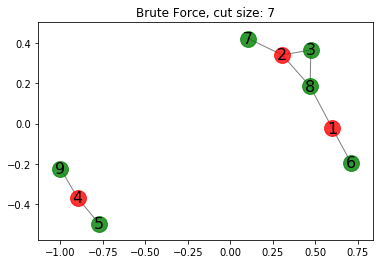

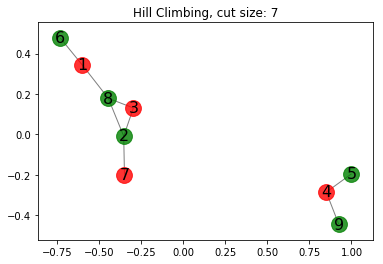

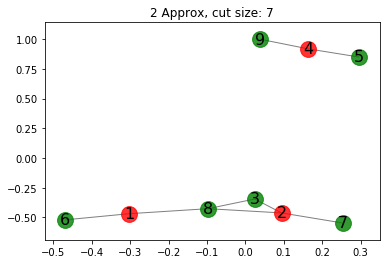

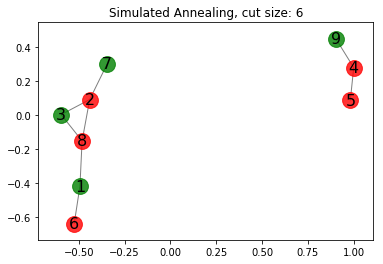

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random

#construct the graph, unweighted
V = []
E = []
G = nx.Graph()
with open("graph.txt",'r') as graph_file:
    raw_vertices = graph_file.readline()
    V = raw_vertices.strip().split(',')
    next_edge = graph_file.readline()
    while next_edge:
        edge = next_edge.strip().split(',')
        E.append(set(edge))
        next_edge = graph_file.readline()
G.add_nodes_from(V)
G.add_edges_from(E)

#vertices of the graph
def V(G):
    return list(G.nodes())

#neighborhood of a vertex
def N(G,v):
    return set(G[v]) #set([u for u in G[0] if {v,u} in G[1]])

#gives the powerset of S, but only of subsets of size at most half |S|
def HP(S):
    power_set = []
    for n in range(int(np.ceil(len(S)/2))):
        power_set += list(map(set, itertools.combinations(S, n)))
    return power_set

#value of a cut
def v(G,S):
    sum = 0
    for u in S:
        sum += len([v for v in N(G,u) if v not in S])
    return sum

#neighboring cuts
def NC(G,S):
    add_vertex = [S | {u} for u in V(G) if u not in S]
    remove_vertex = [S - {u} for u in S]
    return add_vertex + remove_vertex

#computes a maximum cut approximation with hill climbing with random restarts
def HC(G):
    best_cut = 0
    best_val = 0
    for i in range(100):
        k = np.random.randint(low = 1, high = len(V(G)))
        prev_cut = set(random.sample(V(G),k))
        prev_val = v(G,prev_cut)
        while(True):
            cuts = NC(G,prev_cut)
            S = cuts[np.argmin([v(G,T) for T in cuts])]
            if prev_val >= v(G,S):
                break
            prev_cut = S
            prev_val = v(G,S)
        if prev_val > best_val:
            best_val = prev_val
            best_cut = prev_cut
    return best_cut

#temperature function
def temp(t):
    return .00001*t

#computes a maximum cut approximation with simulated annealing
def SA(G):
    k = np.random.randint(low = 1, high = len(V(G)))
    prev_cut = set(random.sample(V(G),k))
    prev_val = v(G,prev_cut)
    for t in range(1000):
        for S in NC(G,prev_cut):
            S_val = v(G,S)
            if S_val > prev_val:
                prev_cut = S
                prev_val = S_val
                break
            else:
                pr = 0 if temp(t) == 0 else np.exp(-np.abs(prev_val - S_val)/temp(t))
                move = np.random.choice([0,1],p =[1-pr,pr])
                if move == 1:
                    prev_cut = S
                    prev_val = S_val
                    break
    return prev_cut

#computes a maximum cut approximation with the 2 approx algorithm
def Approx(G):
    S = set()
    for u in V(G):
        T = N(G,u)
        if len(S & T) < int(np.ceil(len(T)/2)):
            S = S | {u}
    return S

#computes a maximum cut by brute force
def BF(G):
    max_cut = {}
    max_val = 0
    for S in HP(V(G)):
        S_val = v(G,S)
        if S_val > max_val:
            max_val = S_val
            max_cut = S
    return max_cut

#compute the max cuts
S = BF(G)
AS = HC(G)
Ap = Approx(G)
An = SA(G)

#write output
with open("output.txt",'w') as file:
    file.write("Brute Force: " + str(S) + ', ' + str(v(G,S)) + '\n')
    file.write("Hill Climbing: " + str(AS) + ', ' + str(v(G,AS)) + '\n')
    file.write("2 Approx: " + str(Ap) + ', ' + str(v(G,Ap)) + '\n')
    file.write("Simulated Annealing: " + str(An) + ', ' + str(v(G,An)) + '\n')

#compute the visualizaiton graphs
for T,name in [(S, "Brute Force"),(AS, "Hill Climbing"),(Ap, "2 Approx"),(An,"Simulated Annealing")]:
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, nodelist=T, node_color='r', node_size=250, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=(set(V(G))-T), node_color='g', node_size=250, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    labels = {u: u for u in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=16)
    plt.title(name + ", cut size: " + str(v(G,T)))
    plt.show()

{'3', '5', '6', '7', '8', '9'}

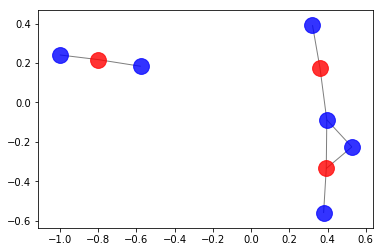